# Predicting Car Prices

The purpose of this project was to practice machine learning workflow to make predictions on a car's market price using it's feature attributes. It compared multiple features against multiple k-values using the k-nearest neighbors algorithm, and the test/train holdout validation method. The goal was to determine what k-value and features combination produced the least amount of error, or lowest root mean squared. For extra credit, a multivariate model k-fold validation method was created as a comparison to the hold-out method. 

### DataQuest Project Scope
This project was for the completion of the DataQuest.io https://www.dataquest.io/ "Machine Learning Fundamentals" module; the twentieth in a series for completing Data Science course path. In this module students learned:

- Sci-kit learn libraries to:
    - Instantiate a learning algorithm: in this module, using KNeighborsRegressor
    - Fit it on a training set and training target
    - Use it to make predictions on the test set
    - Calculate mean and root mean square error
- The difference between test/train validation and k-fold validation
- Test on a univariate model prior to scaling to a multivariate model.

### Results Summary 
With the data provided, the best model appeared to be the multivariate k-fold with a k-value = 5. It had a tighter distribution than the holdout method, especially at k= 5, where any number of the top 5 features yielded similar results. Ideally, more data would be better to confirm the results. 

# Data Source and Exploration

The data set was provided by J.C Schlimmer and resides on the UCI Machine Learning Repository at this [location](https://archive.ics.uci.edu/ml/datasets/automobile). The data file was provided in a .data format without titles; so, the titles (found in the documentation) had to be added upon importing to a .csv file. Machine learning algorithms only allow for numeric data; so, non-continuous numeric types were dropped. The remaining continuous columns were the used to compare with the  target 'price' column. The definitions for each column can be found in the [documentation](https://archive.ics.uci.edu/ml/datasets/automobile).

In [655]:
# Import python libraries
import pandas as pd
import numpy as np
pd.options.display.max_columns = 99

In [656]:
# Add column titles upon import 
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 
        'body-style', 'drive-wheels','engine-location', 'wheel-base', 'length', 'width', 'height', 
        'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 
        'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names=cols)
cars.shape

(205, 26)

In [657]:
# Read in the first 5 columns
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Data Cleaning
The original data set had 205 rows and 26 columns. Columns that could be converted to numeric were, the rest were dropped. Columns with missing values or '?' were replaced with the mean; except for the target column: 'price.' Four rows with missing price values were dropped completely. The cleaned dataframe contained 201 rows and 15 columns containing all continuous values.

In [658]:
# null values and dtypes prior to cleaning
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [659]:
# Maintain only continuous values
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 
                          'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 
                          'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 
                          'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars.head()
numeric_cars.shape

(205, 15)

In [660]:
# replace '?' with 'NAN'
numeric_cars = numeric_cars.replace('?', np.nan)

In [661]:
# Change dtype to float or int
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [662]:
# Because `price` is the target column (the one predictions will be made on),remove any rows with missing `price` values.
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [663]:
# Replace missing values in other columns using column means.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.shape

(201, 15)

In [664]:
numeric_cars.isnull().sum()
cars = numeric_cars.copy()
cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


### Data Normalization
As a final step in the cleaning process, all the numerical columns (except for the price column) were normalized before performing the predictive analysis.  

In [665]:
# Save the price column to be appended after the normalization
car_price = cars['price'].astype(int)
cars

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [666]:
norms = cars.copy() # Create a copy
norms.drop(columns = ['price'], inplace = True) # Drop price column
norms = (norms - norms.min())/(norms.max() - norms.min())# Normalize remaining numerical data
norms.dropna(axis = 1, inplace = True) # Drop NaN (non-numeric columns convert to NaN after global normalization)
norms['price'] = car_price # Create new price column with the un-normalized prices
norms.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450


# K-Nearest Neighbors Holdout Test Models

### Univariate k = 5
A univariate k-nearest neighbors test model was built and tested on the default k = 5 prior to scaling to more complex models. 
This model is a function that takes in a dataframe, a target column ('price'), and a k-value (k = 5). It uses the train and test holdout model of splitting sets 50/50 (50% for training: 50% for testing). Then makes predictions on the 'price' and return the root mean square error. The features with the lowest rmse were engine-size, horsepower, curb-weight, highway-mpg, and  width.

In [667]:
# import sci-kit learn libraries 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error  

In [668]:
cols = ['normalized-losses','wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']

In [669]:
rmse_list = []
def knn_train_test_k5(df, features, target_col):
    #  Shuffel dataset randomly
    np.random.seed(1)
    shuffel_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffel_index)
    # Split the dataframe rows in half creating new dfs for training and testing
    train_df = rand_df.iloc[0:100] 
    test_df = rand_df.iloc[100: ]
    # Instantiates an empty model for K-Nearest Neighbors and fits the train to the target
    knn = KNeighborsRegressor() 
    train_feature = train_df[[features]]
    train_target = train_df[[target_col]]
    knn.fit(train_feature,train_target) 
    # Makes the prediction based previous fit and on the test_df features and returns the rmse as list
    predictions = knn.predict(test_df[[features]])
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)

    rmse_list.append(rmse)
   
    return rmse_list

In [670]:
# Loops through the feature columns and calls the function
for col in cols:
    rmse  =  knn_train_test_k5(norms, col, 'price')
    
# Select the top 5 best predictors of price from the univariate k= 5 model
rmse_k5_univariate = pd.DataFrame(rmse, cols)
best_features_k_5 = rmse_k5_univariate.sort_values(by= 0).head(10)
best_features_k_5.rename(columns = {0:'rmse'}, inplace = True)
best_features_k_5

,rmse
engine-size,3238.462830
horsepower,4037.037713
curb-weight,4401.118255
highway-mpg,4630.026799
width,4704.482590
city-mpg,4766.422505
length,5427.200961
wheel-base,5461.553998
compression-rate,6610.812153
bore,6780.627785


### Multivariate k = 1,3,5,7,9 
The univariate model worked well, so a multivariate model was built to iterate through all features while applying k values 1, 3, 5, 7 and 9 respectively. The RMSE vs. k-value were plotted for each feature in a line graph below. 

In [671]:
cols = ['normalized-losses','wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']

def knn_train_test_k1_9(df, features, target_col):
    # Shuffel dataset randomly
    np.random.seed(1)
    shuffel_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffel_index)
    # Split the dataframe rows in half creating new dfs for training and testing
    train_df = rand_df.iloc[0:100] 
    test_df = rand_df.iloc[100: ]
    
    # loops in the next k-value with each itteration
    kvals = [1,3,5,7,9]
    rmse_dict = {}
    for k in kvals:
        # Instantiates an empty model for K-Nearest Neighbors and fits the train to the target
        knn = KNeighborsRegressor(n_neighbors = k) 
        train_feature = train_df[[features]]
        train_target = train_df[[target_col]]
        knn.fit(train_feature,train_target) 
        # Makes the prediction based previous fit and on the test_df features and returns the rmse as a dictionary
        predictions = knn.predict(test_df[[features]])
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = mse**.5

        rmse_dict[k] = rmse
    return rmse_dict

In [672]:
# Loops through the feature columns and calls the function. Creates a dictionary of the dictionary 'col_rmse_dict'
col_rmse_dict = {}
for col in cols:
    rmse  =  knn_train_test_k1_9(norms, col, 'price') 
    col_rmse_dict[col] = rmse
col_rmse_dict

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,


In [673]:
# Creates a new DataFrame from the above dictionary
# Compute average RMSE across different `k` values for each feature.
rmse_df = pd.DataFrame(col_rmse_dict)
rmse_df.loc['Average'] = rmse_df.mean()
rmse_df

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
1,7846.750605,4493.734069,4628.455501,4559.257298,8904.046456,5264.290231,3258.486106,8602.588485,9116.495955,8087.205347,4170.054848,9511.480068,5901.143574,6025.594967
3,7500.569812,5120.161506,5129.835821,4606.413692,8277.609643,5022.318012,2840.562806,6984.239489,7338.684670,7375.063686,4020.849263,8537.550900,4646.746409,4617.305020
5,7330.197653,5461.553998,5427.200961,4704.482590,8144.441043,4401.118255,3238.462830,6780.627785,8006.529545,6610.812153,4037.037713,7697.459696,4766.422505,4630.026799
7,7756.421586,5448.107051,5313.427721,4571.485046,7679.598124,4330.608104,3563.086774,6878.097966,7803.937797,6732.801283,4353.811860,7510.294160,5232.523034,4796.061440
9,7688.096097,5738.405685,5383.054515,4652.914172,7811.036063,4632.044474,3831.824415,6866.808502,7735.554366,7024.485525,4515.135617,7340.041341,5465.209493,5278.358057
Average,7624.407151,5252.392462,5176.394904,4618.910560,8163.346266,4730.075815,3346.484586,7222.472445,8000.240467,7166.073599,4219.377860,8119.365233,5202.409003,5069.469256


Text(0.5, 1.0, 'Root-Mean-Square for Various K-Values')

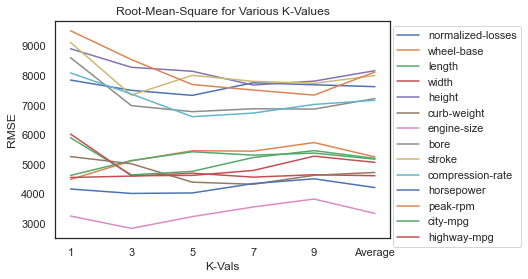

In [674]:
# Plots the results 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="white")
rmse_df.plot()
plt.xlabel('K-Vals')
plt.ylabel('RMSE')
plt.legend(loc="upper center", bbox_to_anchor=(1.2, 1), ncol=1)
plt.title('Root-Mean-Square for Various K-Values')

### Select Top Eight Features
The plot above clearly showed the performance of a single feature: engine-size, stood out among all the others. But, what about the others? Horsepower was the clear second; however, there was some overlap in performance for next seven. The was a big gap between the top eight and the last six, which performed significantly poorer. So, the top eight were replotted without the other six to make them easier to visualize and decipher. 

Text(0.5, 1.0, 'Root-Mean-Square for Various K-Values')

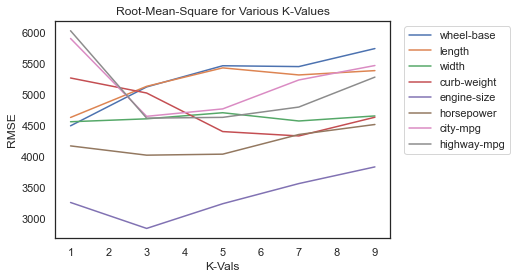

In [675]:
# Plots the results of just the top 8
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="white")
top_eight = ['wheel-base', 'length', 'width', 
       'curb-weight', 'engine-size', 
       'horsepower', 'city-mpg',
       'highway-mpg']
rows = [1,3,5,7,9]
rmse_df.loc[rows ,top_eight].plot()
plt.xlabel('K-Vals')
plt.ylabel('RMSE')
plt.legend(loc="upper center", bbox_to_anchor=(1.2, 1), ncol=1)
plt.title('Root-Mean-Square for Various K-Values')

### Multivariate k = 5 model top two, three, four and five
The next step was to find the optimal number of features from the ones determined above. The best result was 2949, which was attained by using just two features: The engine-size and the horsepower.  

In [676]:
def knn_train_test(df, features, target_col):
    # Shuffel dataset randomly
    np.random.seed(1)
    shuffel_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffel_index)
    # splits the dataframe rows in half creating new dfs for training and testing
    train_df = rand_df.iloc[0:100]
    test_df = rand_df.iloc[100: ]
    rmse_dict = {}
    kval = [5]
    for k in kval:
        #instantiates an empty model for K-Nearest Neighbors 
        knn = KNeighborsRegressor(n_neighbors = k) 
        train_feature = train_df[features]
        train_target = train_df[[target_col]]
        # fits the train to the target
        knn.fit(train_feature,train_target) 
        # makes predictions using model
        predictions = knn.predict(test_df[features])
    
        # Calculate and return rmse
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)

    rmse_dict[k] = rmse
    
    return rmse_dict

In [677]:
best_features = rmse_df.iloc[5].sort_values().head()
print(best_features)

engine-size    3346.484586
horsepower     4219.377860
width          4618.910560
curb-weight    4730.075815
highway-mpg    5069.469256
Name: Average, dtype: float64


In [678]:
for i in range(2,6):
    cols_agg = best_features.index[:i]
    compare_top_cols = knn_train_test(norms, cols_agg, 'price')
    print('{} features:{}'.format(i, compare_top_cols))

2 features:{5: 2949.8817277180374}
3 features:{5: 3580.7376651928435}
4 features:{5: 3487.340917327035}
5 features:{5: 3410.2170133901805}


### Mulitivariate k = 1 - 25 model top two, three, four and five
The final step was to build a model that took in the top two, three, four and five features, and apply k values from 1 to 25 to all of them. The RMSE vs. k-value results for each were plotted below. The lowest RMSE was 2657, which occurred with four features at k = 2. 

In [679]:
def knn_train_test_k1_25(df, features, target_col):
    # Shuffel dataset randomly
    np.random.seed(1)
    shuffel_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffel_index)
    # splits the dataframe rows in half creating new dfs for training and testing
    train_df = rand_df.iloc[0:100]
    test_df = rand_df.iloc[100: ]
    
    kval = [i for i in range (1, 26)]  
    rmse_dict = {}
    for k in kval:
        #instantiates an empty model for K-Nearest Neighbors 
        knn = KNeighborsRegressor(n_neighbors = k) 
        train_feature = train_df[features]
        train_target = train_df[[target_col]]
        # fits the train to the target
        knn.fit(train_feature,train_target) 
        # makes predictions using model
        predictions = knn.predict(test_df[features])
    
        # Calculate and return rmse
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        rmse_dict[k] = rmse
    return rmse_dict

k_rmse_results = {}

# cycle through features 
best_features = ['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg', ]
for i in range(2,6):
    k_rmse_results['{} features'.format(i)] = knn_train_test_k1_25(
        norms, 
        best_features[:i], 
        'price')
k_rmse_results

{'2 features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579,
  25: 4955.892429427362},
 '3 features': {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.216494947217,
 

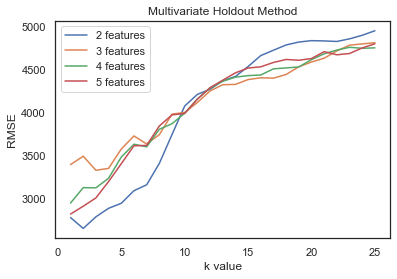

In [680]:
# plot results 
for k,v in k_rmse_results.items():
    x1 = list(v.keys())
    y1 = list(v.values())
    plt.plot(x1,y1, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.title('Multivariate Holdout Method')
plt.legend()

# K-Nearest Neighbors K-Fold Test Model
The holdout method splits the rows of the dataset for 50% training /50% testing, then swaps the datasets and repeats. The k-fold method, on the other hand, splits the data into n > 2 folds and assigns all but one for training, and the one for testings. Then it rotates through folds so that all folds have the opportunity to be training and test folds. The advantage is that the model isn't repeatedly bias towards a specific subset of data. 

The data was split into 5 folds for the model below, iterated over the best features and applied the k values from 1 to 25 to each of them. The results were plotted below.   

In [681]:
# import cross_val_score, Kfold method
from sklearn.model_selection import cross_val_score, KFold
def multi_kfold(df, features, target):
    # iterate over k-vals
    kval = [i for i in range (1, 26)]  
    avg_rmse_dict = {}
    for k in kval:
        kf = KFold(n_splits = 5, shuffle = True, random_state = 1)
        knn = KNeighborsRegressor(n_neighbors= k, algorithm = 'auto')
    # get average rmse and return results
        mses = cross_val_score(knn, df[features], df[target], scoring = 'neg_mean_squared_error', cv = kf)
        abb = np.absolute(mses)
        avg_rmse =sum(np.sqrt(abb))/5
        avg_rmse_dict[k] = avg_rmse
    return avg_rmse_dict


In [682]:
# iterate over best features
k_avg_rmse_results = {}
best_features = ['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg']
for i in range(2,6):
    k_avg_rmse_results['{} features'.format(i)] = multi_kfold(
        norms, 
        best_features[:i], 
        'price')

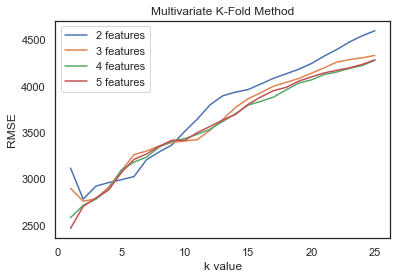

In [683]:
# plot results
for k,v in k_avg_rmse_results.items():
    x2 = list(v.keys())
    y2 = list(v.values())  
    plt.plot(x2,y2, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.title('Multivariate K-Fold Method')
plt.legend()

# Conclusion

Of all the features, engine-size clearly out-performed the others on it's own. Horsepower was a clear second, but there was quite a bit of overlap among the remaining features over the span of k-values.

The multivariate holdout method and the k-fold method results differed from one another, due to the amount of variability in the holdout method, compared with the k-fold method. Also, both methods had a looser distribution under k = 5; so the accuracy of both models at k < 5 was poor. 

The best model appeared to be the multivariate k-fold with a k-value = 5. This was the k-value where the feature numbers converged as shown from the plot above. With k = 5, two to five of the top features could be iterated through the model and return very similar results. 

This model was trained and tested on only 201 data points. In retrospect, it's not a lot. More data would provide more confidence in the results. 